In [4]:
import pandas as pd

# Charger le dataset fusionné
file_path = r"C:\Users\amirb\Downloads\human_vs_ia_choice.csv"
dataset = pd.read_csv(file_path)

# Liste des modèles
models = ['ai_choice_gpt', 'ai_choice_mistral', 'ai_choice_gemini']

# Calculer la correspondance avec les choix humains
print("Correspondance avec les choix humains :")
for model in models:
    match_percentage = (dataset['choice'] == dataset[model]).mean() * 100
    print(f"Correspondance entre Humains et {model} : {match_percentage:.2f}%")

# Calculer la correspondance entre les IA
print("\nCorrespondance entre les IA :")
for i, model1 in enumerate(models):
    for model2 in models[i+1:]:
        match_percentage = (dataset[model1] == dataset[model2]).mean() * 100
        print(f"Correspondance entre {model1} et {model2} : {match_percentage:.2f}%")


Correspondance avec les choix humains :
Correspondance entre Humains et ai_choice_gpt : 65.28%
Correspondance entre Humains et ai_choice_mistral : 62.34%
Correspondance entre Humains et ai_choice_gemini : 65.59%

Correspondance entre les IA :
Correspondance entre ai_choice_gpt et ai_choice_mistral : 68.59%
Correspondance entre ai_choice_gpt et ai_choice_gemini : 72.58%
Correspondance entre ai_choice_mistral et ai_choice_gemini : 75.32%


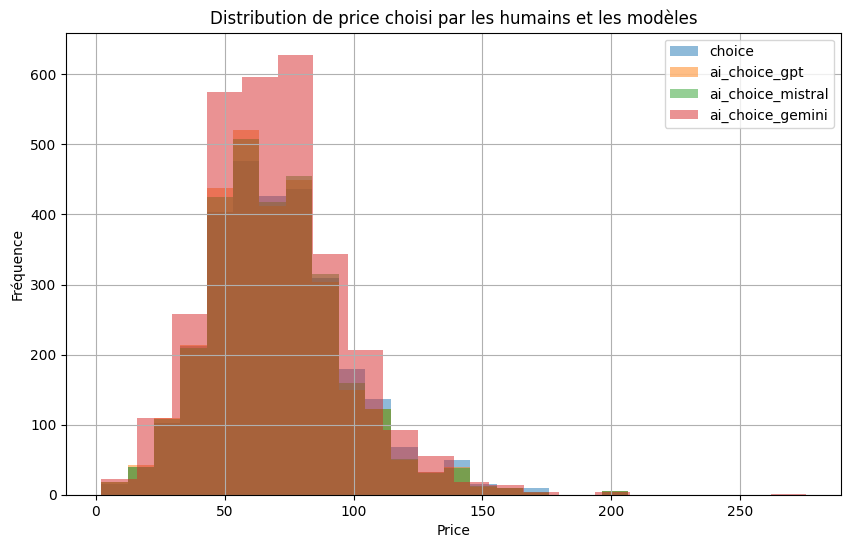

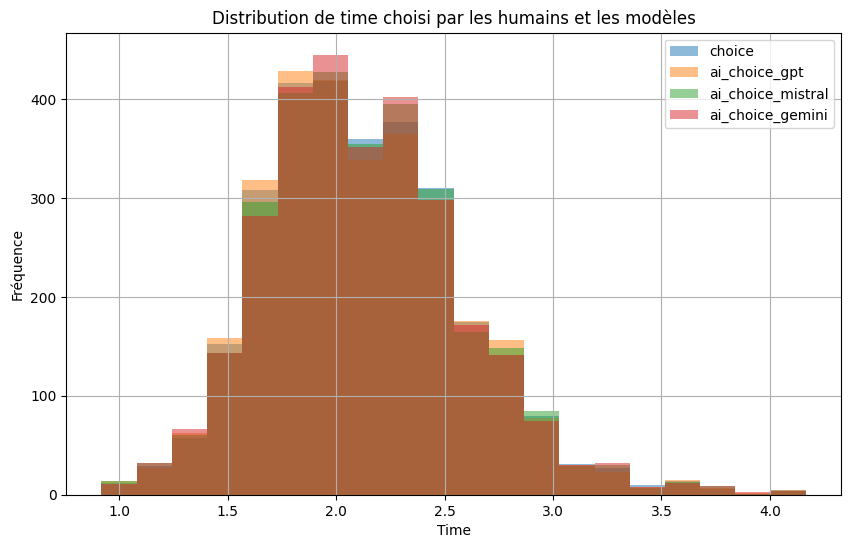

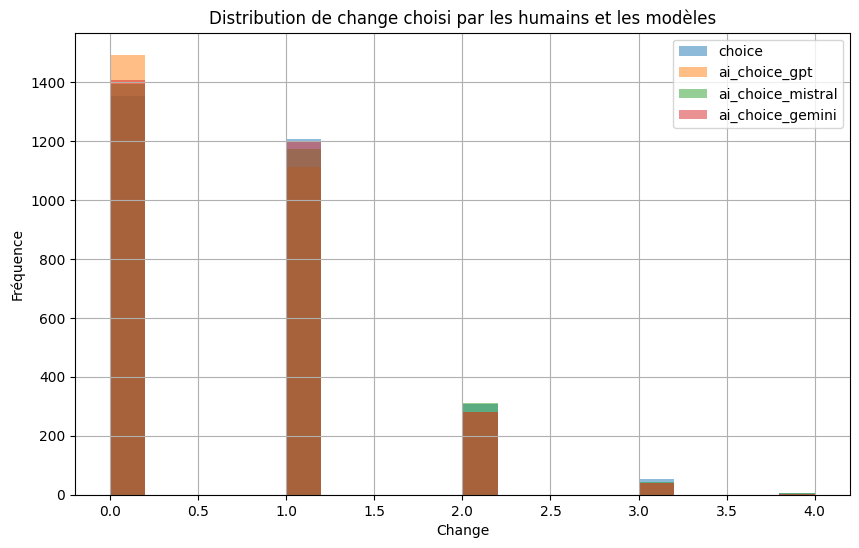

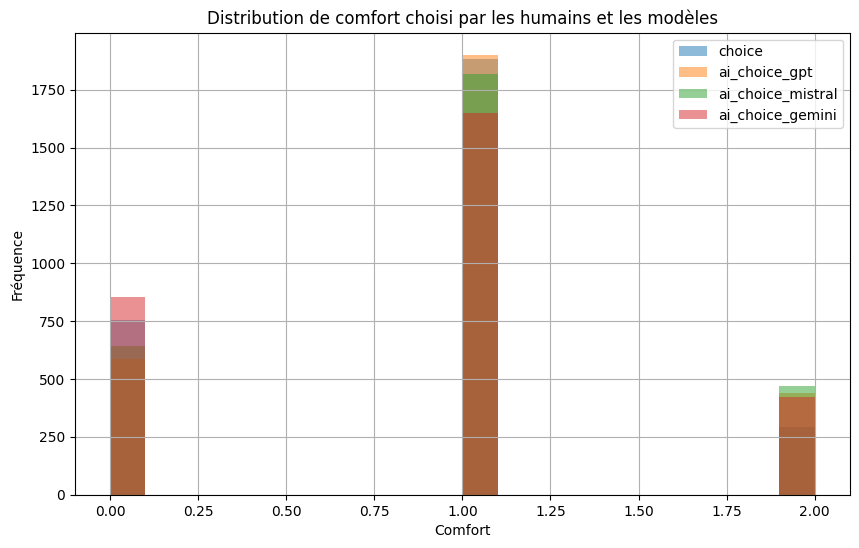

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset fusionné
file_path = r"C:\Users\amirb\Downloads\human_vs_ia_choice.csv"
dataset = pd.read_csv(file_path)

# Liste des variables et modèles à analyser
variables = ['price', 'time', 'change', 'comfort']
models = ['choice', 'ai_choice_gpt', 'ai_choice_mistral', 'ai_choice_gemini']

# Ajouter des colonnes pour les variables choisies
for var in variables:
    for model in models:
        column_name = f"chosen_{var}_{model}"
        dataset[column_name] = dataset.apply(
            lambda row: row[f"{var}_A"] if row[model] == 'A' else row[f"{var}_B"],
            axis=1
        )

# Visualisation des distributions
for var in variables:
    plt.figure(figsize=(10, 6))
    for model in models:
        column_name = f"chosen_{var}_{model}"
        dataset[column_name].hist(alpha=0.5, label=model, bins=20)
    plt.title(f"Distribution de {var} choisi par les humains et les modèles")
    plt.xlabel(var.capitalize())
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()


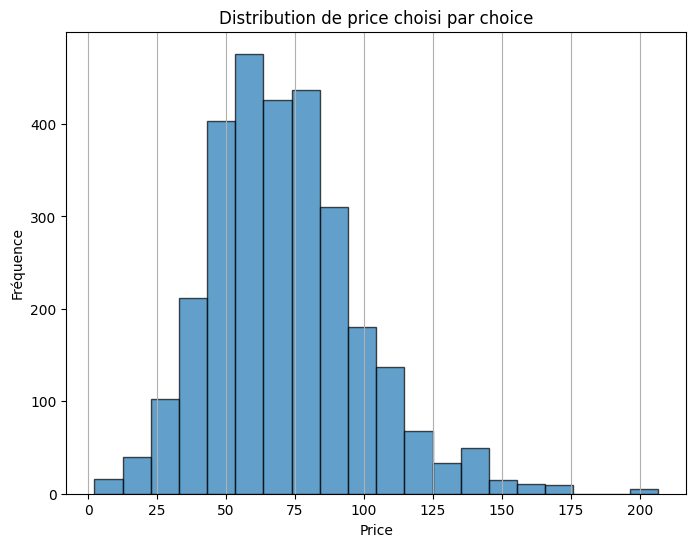

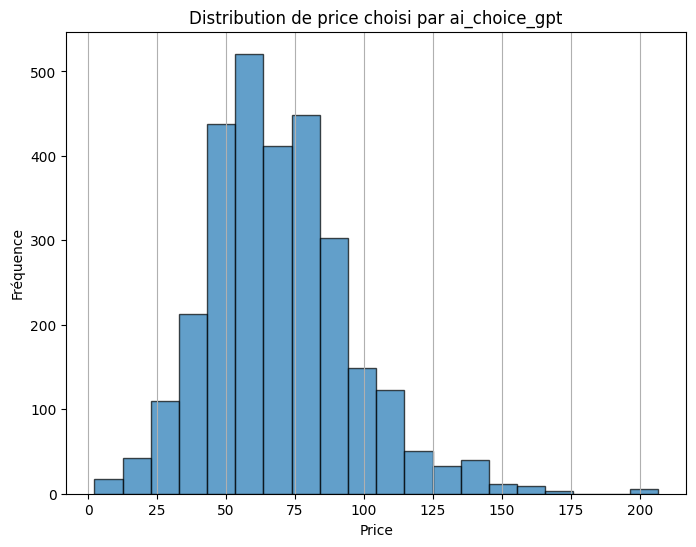

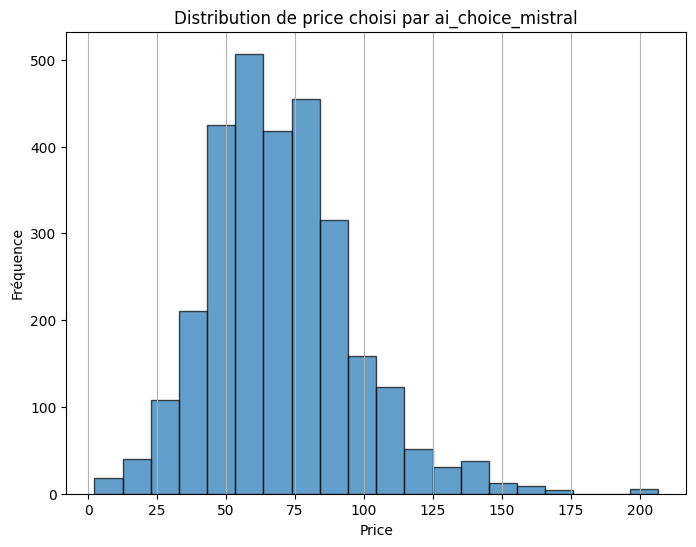

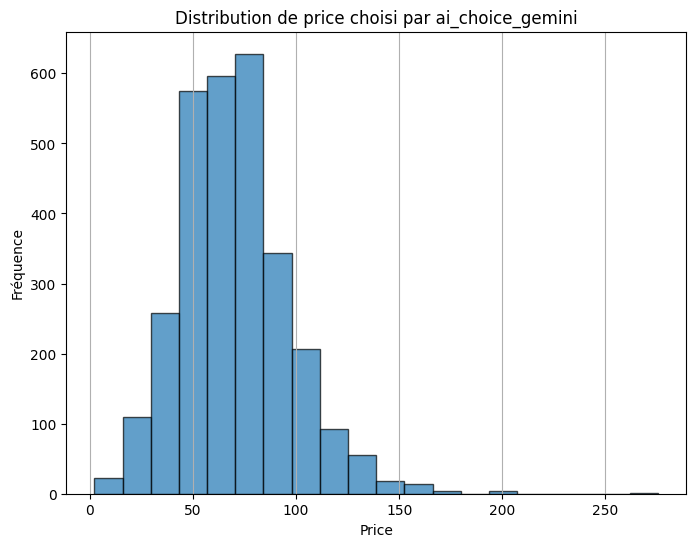

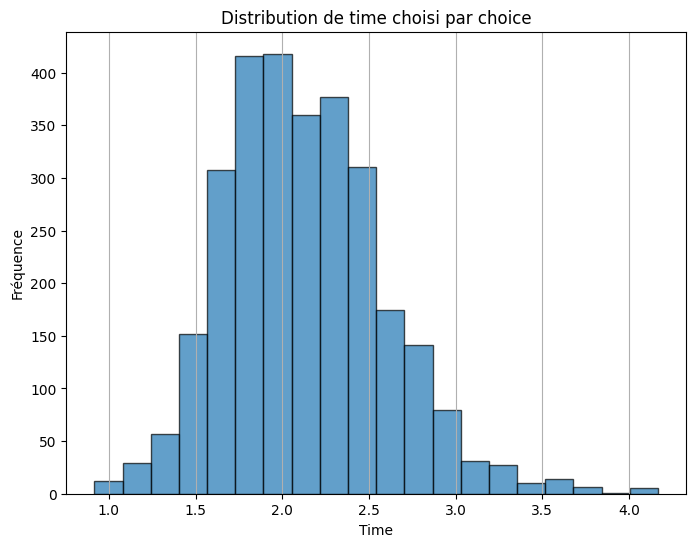

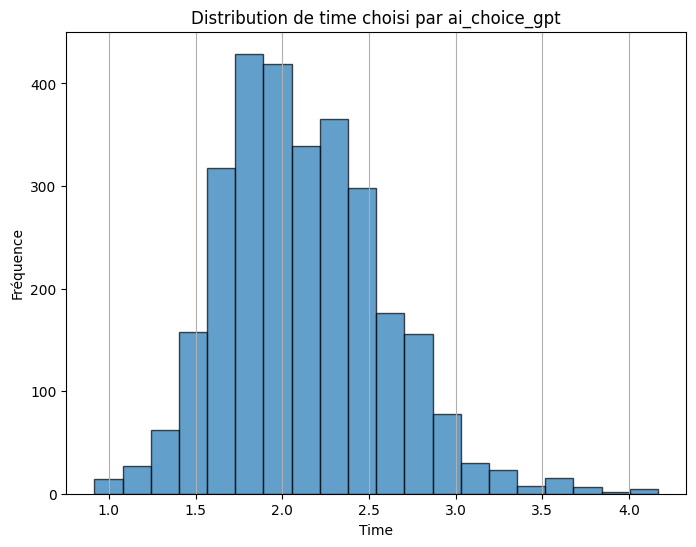

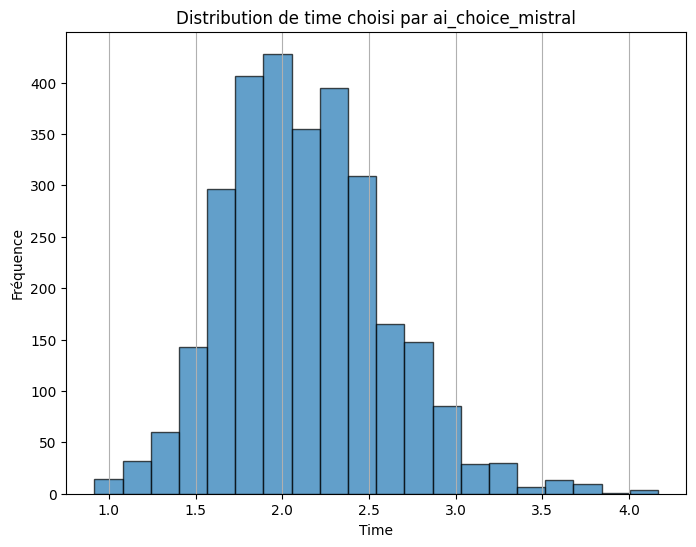

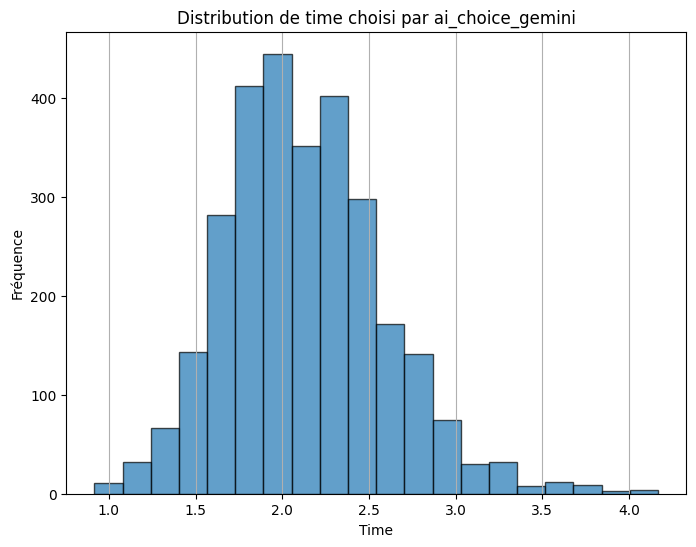

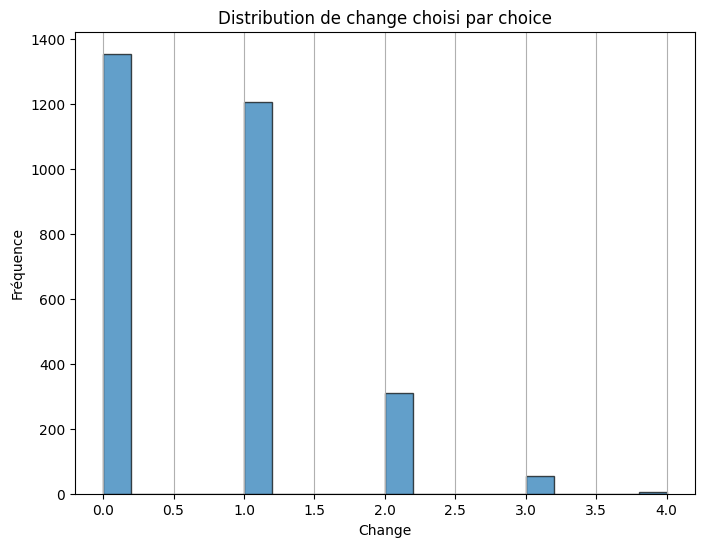

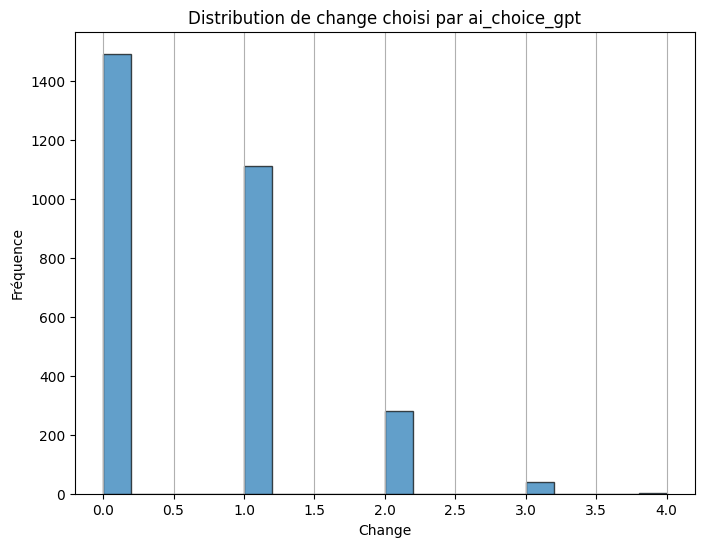

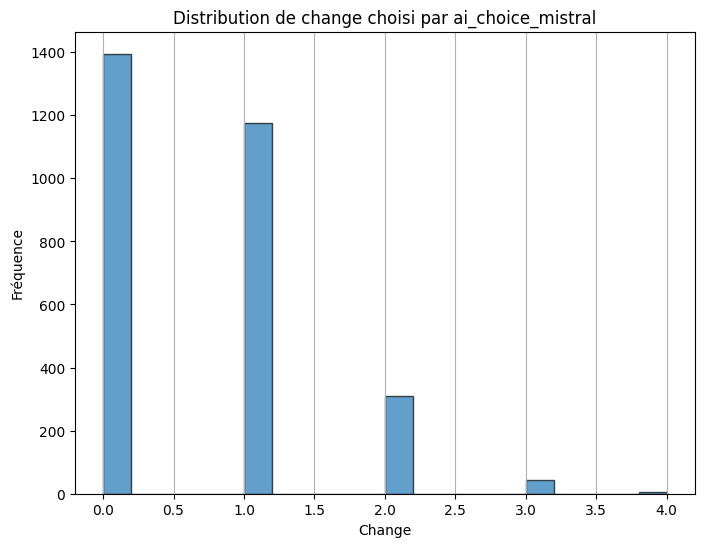

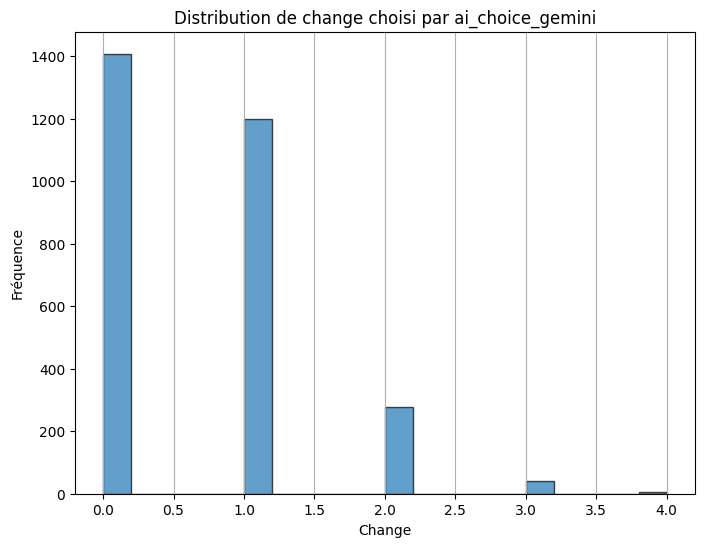

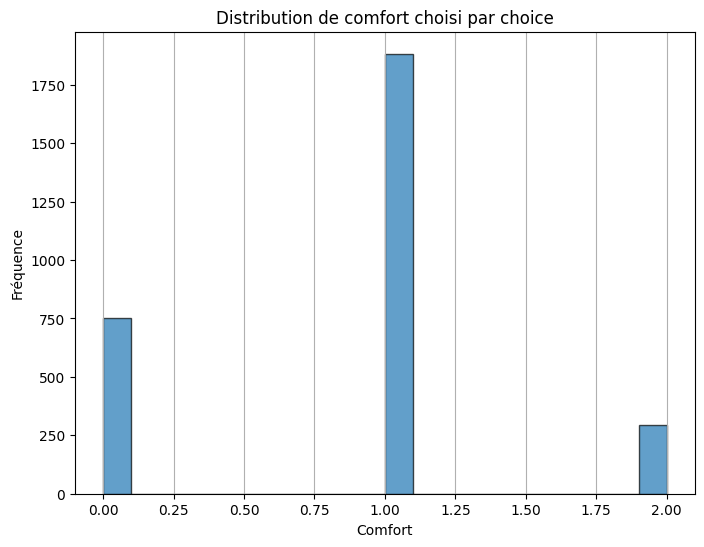

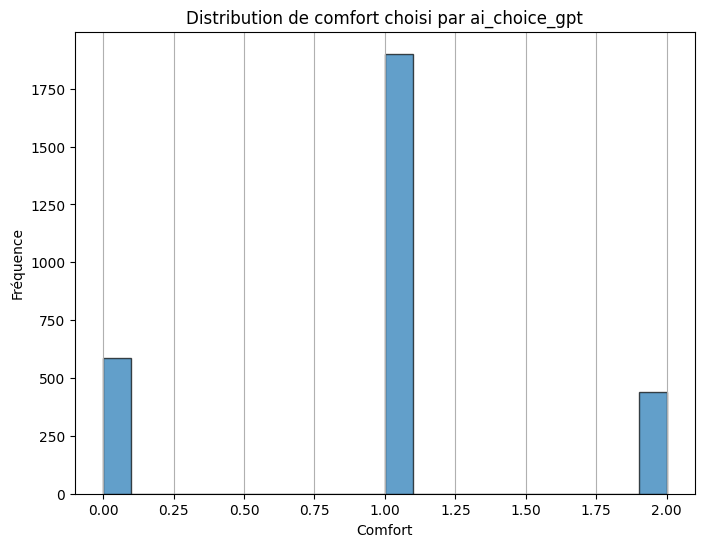

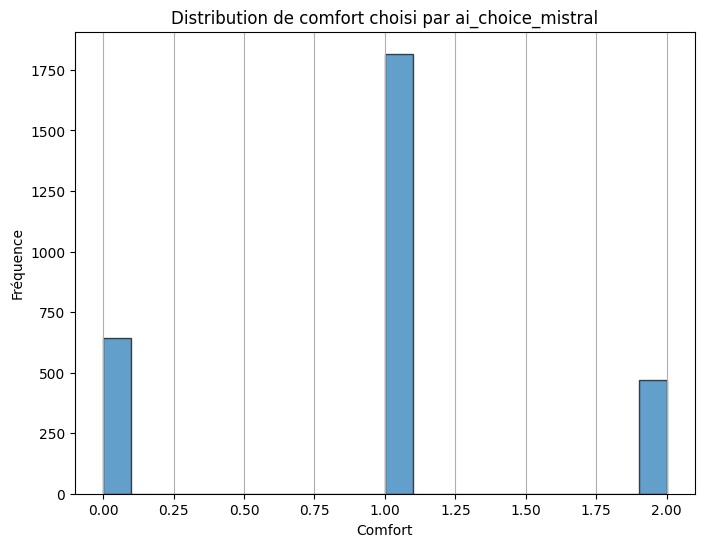

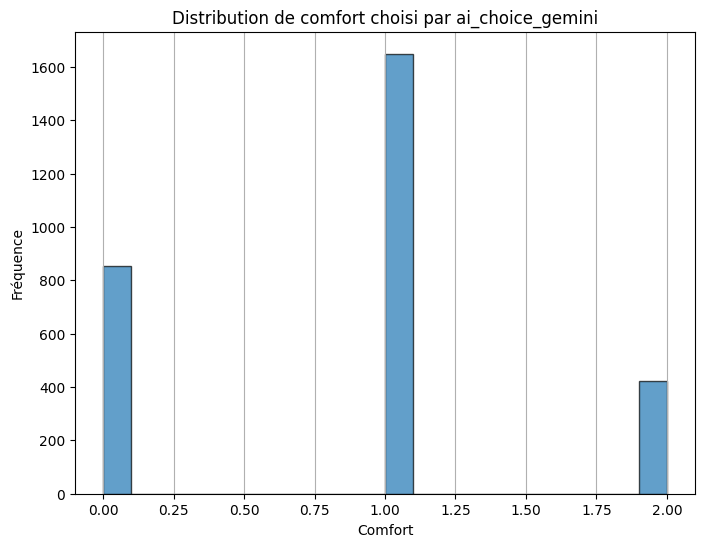

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset fusionné
file_path = r"C:\Users\amirb\Downloads\human_vs_ia_choice.csv"
dataset = pd.read_csv(file_path)

# Liste des variables et modèles à analyser
variables = ['price', 'time', 'change', 'comfort']
models = ['choice', 'ai_choice_gpt', 'ai_choice_mistral', 'ai_choice_gemini']

# Ajouter des colonnes pour les variables choisies
for var in variables:
    for model in models:
        column_name = f"chosen_{var}_{model}"
        dataset[column_name] = dataset.apply(
            lambda row: row[f"{var}_A"] if row[model] == 'A' else row[f"{var}_B"],
            axis=1
        )

# Générer des histogrammes séparés
for var in variables:
    for model in models:
        plt.figure(figsize=(8, 6))
        column_name = f"chosen_{var}_{model}"
        dataset[column_name].hist(alpha=0.7, bins=20, edgecolor='black')
        plt.title(f"Distribution de {var} choisi par {model}")
        plt.xlabel(var.capitalize())
        plt.ylabel("Fréquence")
        plt.grid(axis='y')
        plt.show()


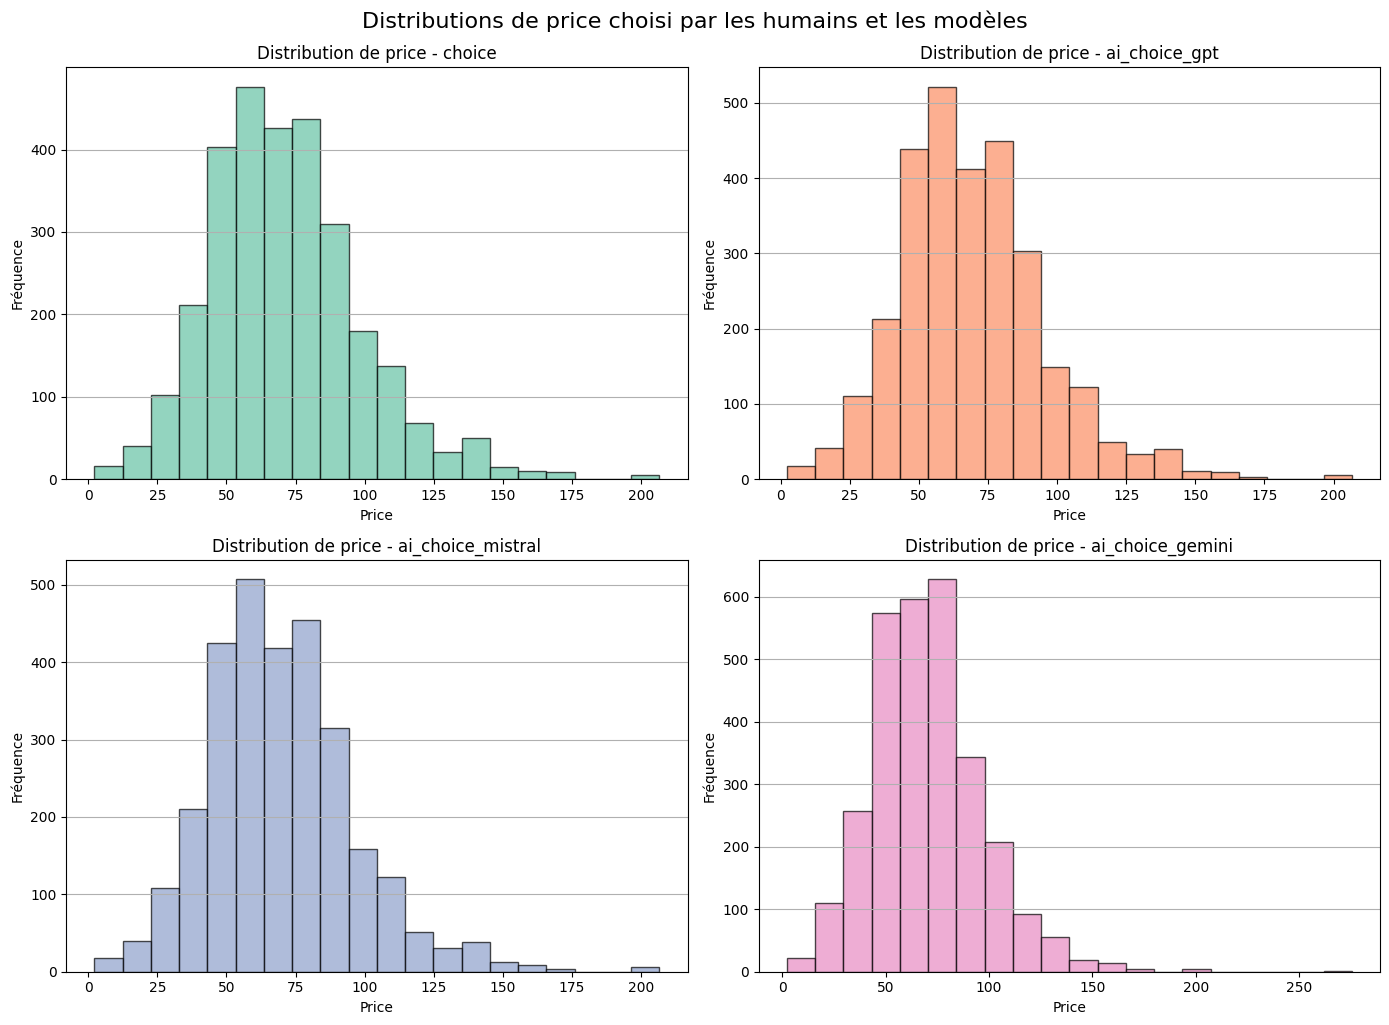

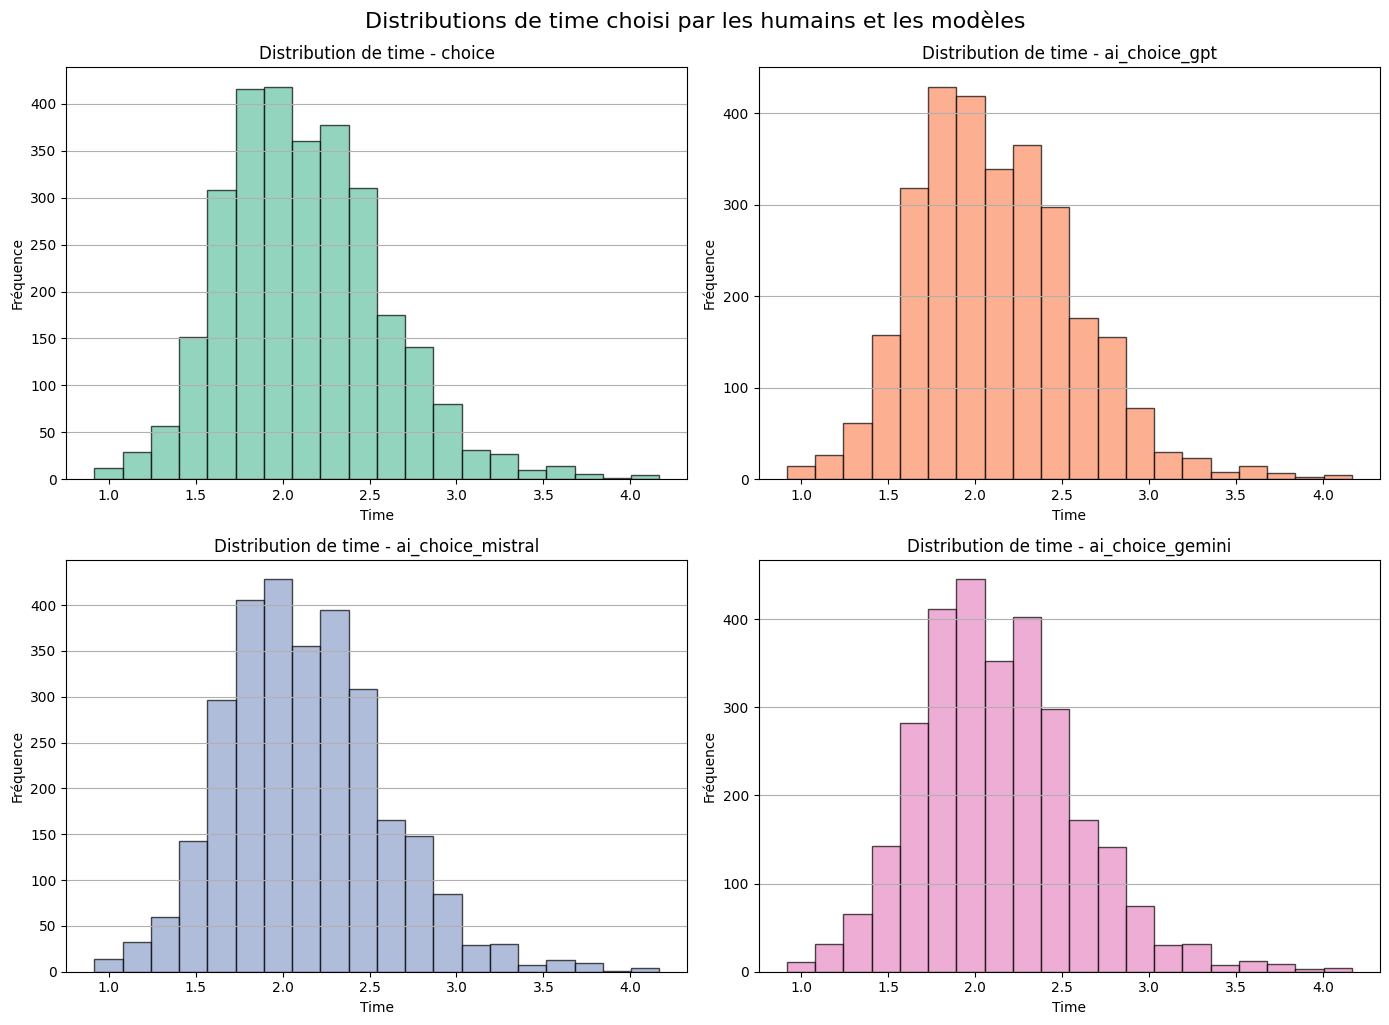

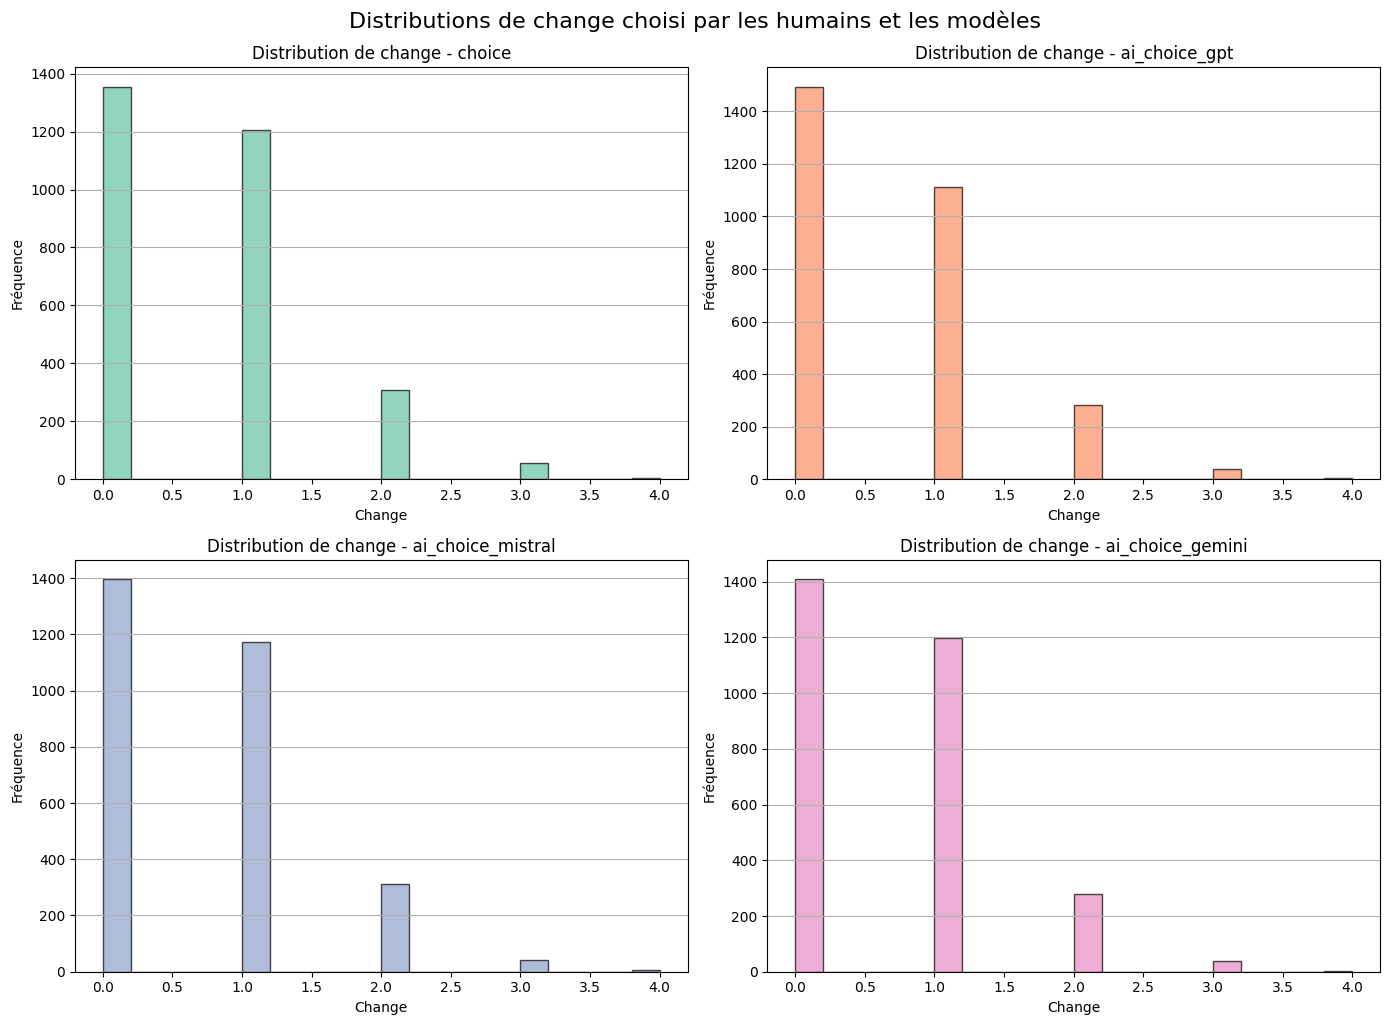

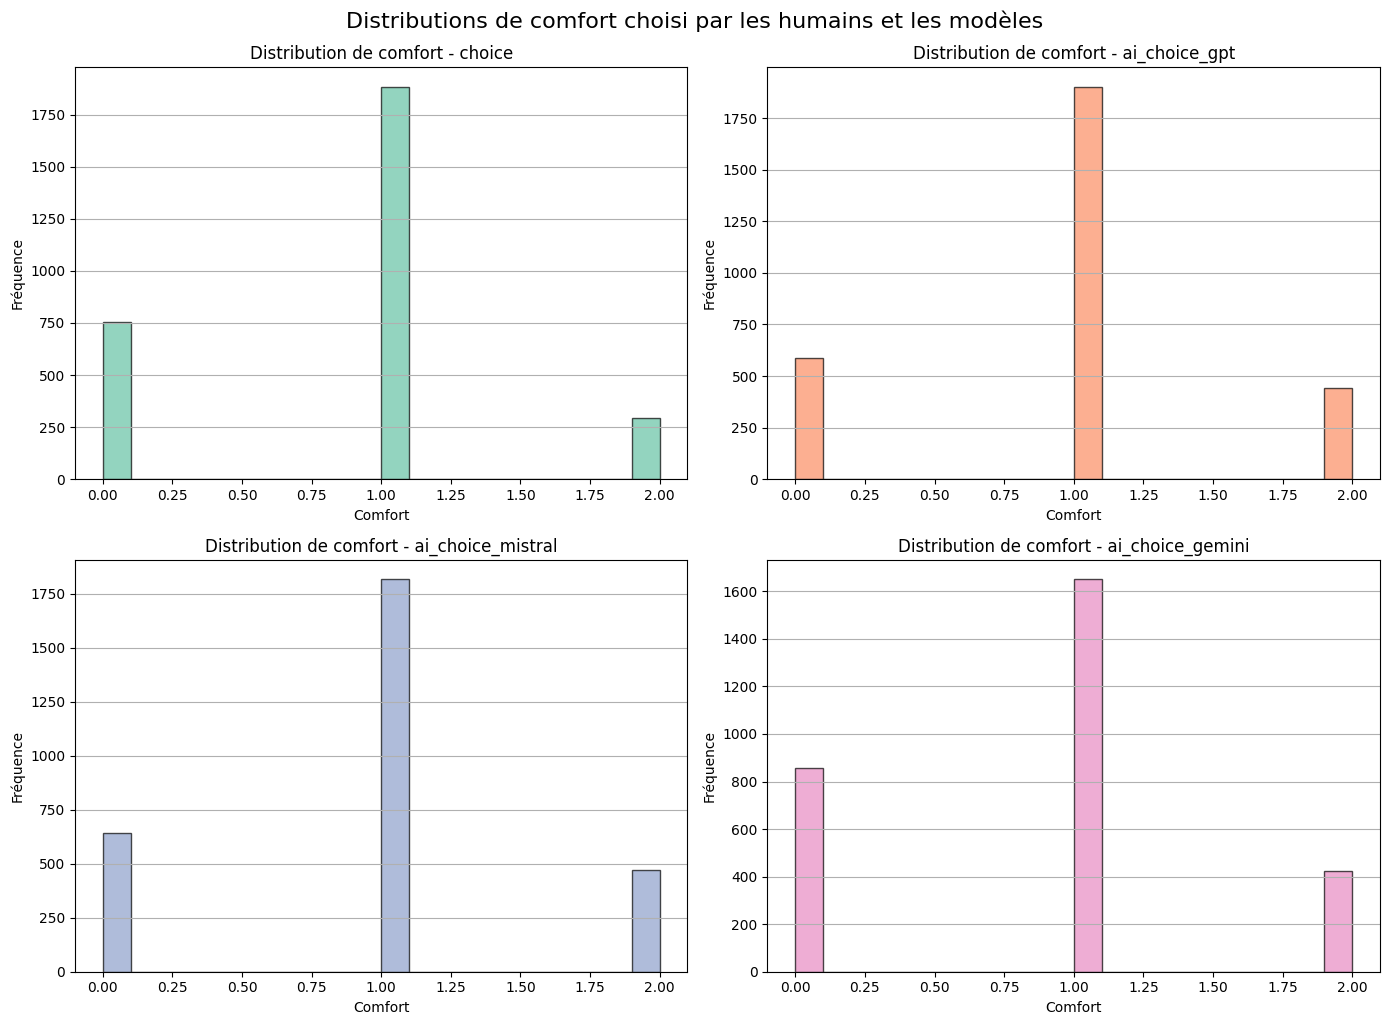

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset fusionné
file_path = r"C:\Users\amirb\Downloads\human_vs_ia_choice.csv"
dataset = pd.read_csv(file_path)

# Liste des variables et modèles à analyser
variables = ['price', 'time', 'change', 'comfort']
models = ['choice', 'ai_choice_gpt', 'ai_choice_mistral', 'ai_choice_gemini']

# Ajouter des colonnes pour les variables choisies
for var in variables:
    for model in models:
        column_name = f"chosen_{var}_{model}"
        dataset[column_name] = dataset.apply(
            lambda row: row[f"{var}_A"] if row[model] == 'A' else row[f"{var}_B"],
            axis=1
        )

# Visualisation des distributions : un graphique par modèle et par variable
for var in variables:
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Création d'une grille 2x2 pour les modèles
    axs = axs.flatten()  # Facilite l'accès aux axes

    for i, model in enumerate(models):
        column_name = f"chosen_{var}_{model}"
        axs[i].hist(dataset[column_name], alpha=0.7, bins=20, edgecolor='black', color=plt.cm.Set2(i))
        axs[i].set_title(f"Distribution de {var} - {model}", fontsize=12)
        axs[i].set_xlabel(var.capitalize(), fontsize=10)
        axs[i].set_ylabel("Fréquence", fontsize=10)
        axs[i].grid(axis='y')

    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()
    plt.suptitle(f"Distributions de {var} choisi par les humains et les modèles", fontsize=16, y=1.02)
    plt.show()
